In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy 


In [9]:
#Set out Lat and Lon coordinates. 
latitude_coordinates = (-50, 50)
longitude_coordinates = (-100, 100)

cities = []
coordinates = []

latitude = np.random.uniform(latitude_coordinates[0], latitude_coordinates[1], size=1250)
longitude = np.random.uniform(longitude_coordinates[0], longitude_coordinates[1], size=1250)
coordinates = zip(latitude, longitude)

for coordinates in coordinates:
    city = citipy.nearest_city(coordinates[0], coordinates[1]).city_name
    if city not in cities:
        cities.append(city)

len(cities)


642

In [10]:
# Outlining all the lists and counters required for to perform calls to api. 
city_list = []
cloud_list = []
country_list = []
date_list = []
humidity_list = []
lats_list = []
lngs_list = []
temp_max_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

In [11]:
print("Beginning Data Retrieval ")
print("-------------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

#Creating a for lop to match city with city names. 
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response["name"])
        cloud_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lats_list.append(response["coord"]["lat"])
        lngs_list.append(response["coord"]["lon"])
        temp_max_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        
        else:
            index_counter = index_counter + 1
        
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}")
        
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")

Beginning Data Retrieval 
-------------------------------
Processing Record 1 of Set 1 : tubuala
Processing Record 2 of Set 1 : thinadhoo
Processing Record 3 of Set 1 : bogande
Processing Record 4 of Set 1 : saint george
Processing Record 5 of Set 1 : mogadishu
Processing Record 6 of Set 1 : lebu
Processing Record 7 of Set 1 : villavieja
Processing Record 8 of Set 1 : saint-philippe
City not found. Skipping...
Processing Record 9 of Set 1 : arraial do cabo
Processing Record 10 of Set 1 : riberalta
Processing Record 11 of Set 1 : canico
Processing Record 12 of Set 1 : kabinda
Processing Record 13 of Set 1 : matam
Processing Record 14 of Set 1 : sao joao da barra
Processing Record 15 of Set 1 : sao jose da coroa grande
Processing Record 16 of Set 1 : camacupa
City not found. Skipping...
Processing Record 17 of Set 1 : mwanza
Processing Record 18 of Set 1 : tocopilla
Processing Record 19 of Set 1 : hithadhoo
Processing Record 20 of Set 1 : ilhabela
Processing Record 21 of Set 1 : dordrech

In [41]:
#Create a dataframe using information from data retrieval
weather_data = pd.DataFrame({
    "City" : city_list,
    "Lat" : lats_list,
    "Lng" : lngs_list,
    "Max Temp" : temp_max_list,
    "Humidity" : humidity_list,
    "Clouds" : cloud_list,
    "Wind Speed" : wind_speed_list,
    "Country" : country_list,
    "Date" : date_list    
})

weather_data.head(400)

,City,Lat,Lng,Max Temp,Humidity,Clouds,Wind Speed,Country,Date
0,Tubualá,9.5167,-79.0333,78.33,86,100,9.24,PA,1627218500
1,Thinadhoo,0.5333,72.9333,81.73,72,44,6.17,MV,1627218501
2,Bogandé,12.9714,-0.1436,92.82,41,77,9.31,BF,1627218501
3,Saint George,37.1041,-113.5841,76.35,73,1,1.01,US,1627218502
4,Mogadishu,2.0371,45.3438,77.81,74,17,25.30,SO,1627218503
...,...,...,...,...,...,...,...,...,...
395,Scarborough,54.2797,-0.4044,71.92,69,81,3.00,GB,1627218929
396,Yaan,7.3833,8.5667,81.75,67,89,8.68,NG,1627218930
397,Rāzole,16.4833,81.8333,89.89,78,100,4.16,IN,1627218932
398,Perbaungan,3.5679,98.9560,84.31,82,96,3.27,ID,1627218932


In [24]:
# Create CSV file for above created dataframe and store data 
new_output_csv = "output_data/weather.csv"
weather_data.to_csv("output_data/weather.csv", index=False)

In [32]:
# Weather_data frame summary 
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Clouds,Wind Speed,Date
count,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,5.920000e+02
mean,11.823845,-1.188087,79.213395,58.631757,43.543919,8.708784,1.627219e+09
std,26.137167,59.511320,12.487856,25.148686,41.085583,5.499803,1.920124e+02
min,-51.622600,-121.895000,33.850000,5.000000,0.000000,0.000000,1.627218e+09
25%,-9.691025,-57.783050,73.220000,38.000000,1.000000,4.610000,1.627219e+09
50%,13.216700,10.677800,79.420000,63.000000,29.500000,8.110000,1.627219e+09
75%,36.719725,44.013175,84.677500,80.000000,92.000000,11.510000,1.627219e+09
max,60.143200,141.966700,121.080000,100.000000,100.000000,35.680000,1.627219e+09


In [72]:
drop_humity = weather_data[weather_data['Humidity'].values > 100]
print(drop_humity)

Empty DataFrame
Columns: [City, Lat, Lng, Max Temp, Humidity, Clouds, Wind Speed, Country, Date]
Index: []


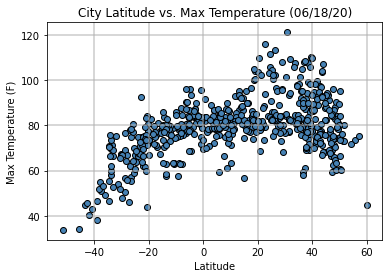

In [50]:
# Latitdue vs. Temperature Plot 
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Max Temperature (06/18/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)
plt.savefig("Images_output/ILatitude vs Max Temperature.png")

In [ ]:
# The above plot shows the as you go from 0 to 40 degress in latitude the temperture goes up on this given day. 

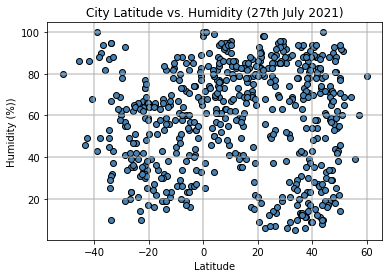

In [51]:
# Latitude vs. Humidity Plot 
plt.scatter(weather_data["Lat"], weather_data["Humidity"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Humidity (27th July 2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%))")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)
plt.savefig("Images_output/City Latitude vs Humidity.png")

In [ ]:
# The plot above looks at latitude of cities and humidity it's clear theres no correlation between both. 

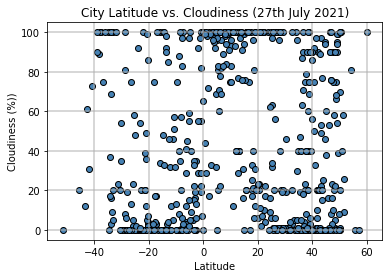

In [52]:
# Latitude vs. Cloudiness Plot 
plt.scatter(weather_data["Lat"], weather_data["Clouds"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Cloudiness (27th July 2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%))")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)
plt.savefig("Images_output/City Latitude vs Cloudiness.png")

In [ ]:
# The plot shows latitude and cloudiness and clearly theres no correlation between both. 

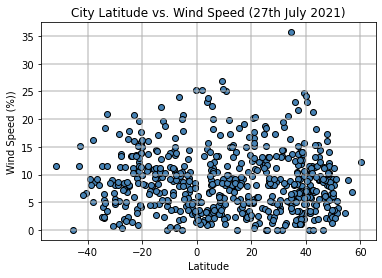

In [48]:
# Latitude vs. Wind Speed Plot
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Wind Speed (27th July 2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%))")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)
plt.savefig("Images_output/City Latitude vs Wind Speed.png") 

In [ ]:
# The plot shows a correlation between the latitiude of a city and wind speed and you can see the 
# more you move away from the equator it picks up in wind speed. 

In [60]:
# Linear Regression 
# Split cities between hemisphere
earth_postion = weather_data['Lat'] > 0
northern_hemisphere = weather_data[earth_postion]
southern_hemisphere = weather_data[~earth_postion]

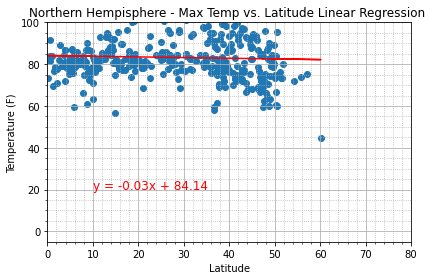

<Figure size 432x288 with 0 Axes>

In [67]:
# Northern Hempisphere - Max Temp vs. Latitude Linear Regression 
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Northern Hempisphere - Max Temp vs. Latitude Linear Regression ')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(-5, 100)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images_output/nh_lat_temp_regression.png")

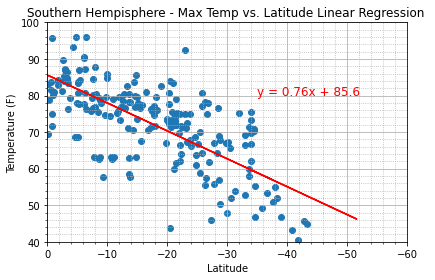

<Figure size 432x288 with 0 Axes>

In [69]:
# Southern Hempisphere - Max Temp vs. Latitude Linear Regression 
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Southern Hempisphere - Max Temp vs. Latitude Linear Regression ')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(40, 100)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images_output/Slat_temp_regression.png")


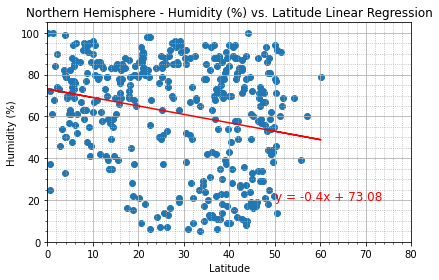

<Figure size 432x288 with 0 Axes>

In [70]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images_output/nlat_humid_regression.png")

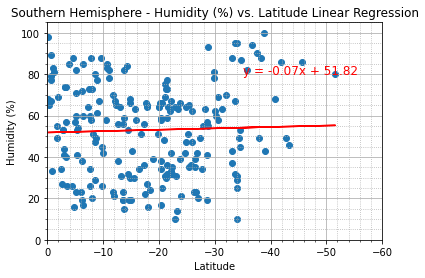

<Figure size 432x288 with 0 Axes>

In [73]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()
plt.savefig("Images_output/slat_humid_regression.png")

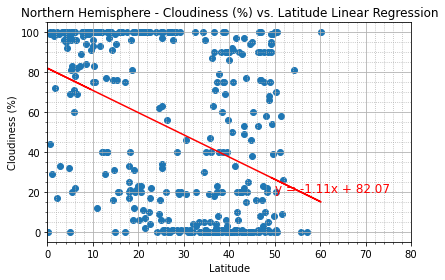

<Figure size 432x288 with 0 Axes>

In [74]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images_output/nlat_clouds_regression.png")

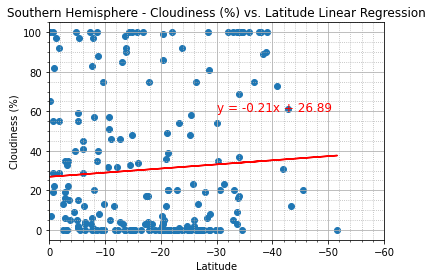

<Figure size 432x288 with 0 Axes>

In [76]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()
plt.savefig("Images_output/slat_clouds_regression.png")


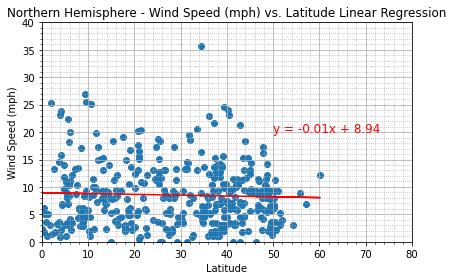

<Figure size 432x288 with 0 Axes>

In [77]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images_output/nlat_wind_regression.png")

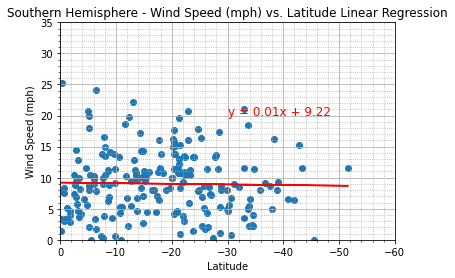

<Figure size 432x288 with 0 Axes>

In [66]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 35)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()
plt.savefig("Images_output/sw_lat_regression.png")